In [8]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  

데이터셋 로드 및 2D 변환

In [9]:
# 손글씨 데이터셋 로드 (digits 데이터셋)
digits = datasets.load_digits()

# 데이터의 샘플 수
n_samples = len(digits.images)

# 데이터를 2D 배열로 변환 (각 이미지가 8x8 크기이므로 64차원 벡터로 변환)
data = digits.images.reshape((n_samples, -1))

KNN 분류

0.9888888888888889
[0]


c:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

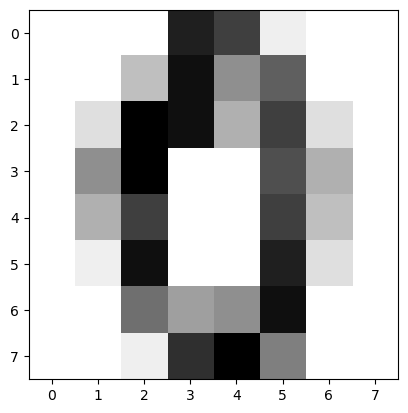

In [10]:
# KNN 분류기 객체 생성, 이웃의 수를 6으로 설정
knn = KNeighborsClassifier(n_neighbors = 6)

# 데이터를 훈련 세트와 테스트 세트로 나누기 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size = 0.2
)

# KNN 모델 훈련
knn.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = knn.predict(X_test)

# 모델의 정확도 계산
scores = metrics.accuracy_score(y_test, y_pred)

# 정확도 출력
print(scores)

# 테스트 세트에서 10번째 이미지를 출력
plt.imshow(X_test[10].reshape(8, 8), cmap = plt.cm.gray_r, interpolation = 'nearest')

# 10번째 이미지에 대한 예측 수행
y_pred = knn.predict([X_test[10]])

# 예측된 결과 출력
print(y_pred)

SVM 분류

Accuracy: 0.9888888888888889


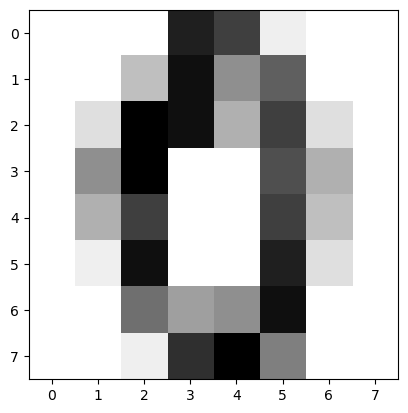

Predicted label for test image 10: [0]


In [16]:
# SVM 분류기 객체 생성
svm = SVC(gamma=0.001, kernel='rbf')  # RBF 커널을 사용한 SVM

# SVM 모델 훈련
svm.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = svm.predict(X_test)

# 정확도 평가
scores = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {scores}")

# 테스트 세트에서 10번째 이미지 출력
plt.imshow(X_test[10].reshape(8, 8), cmap = plt.cm.gray_r, interpolation = 'nearest')
plt.show()

# 10번째 이미지에 대한 예측 수행
y_pred_single = svm.predict([X_test[10]])
print(f"Predicted label for test image 10: {y_pred_single}")